In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Exercise 1

In [2]:
# importing the dataset
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx')

# preprocessing
df = df.iloc[: , 1:]

df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


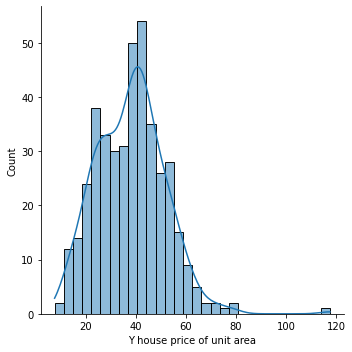

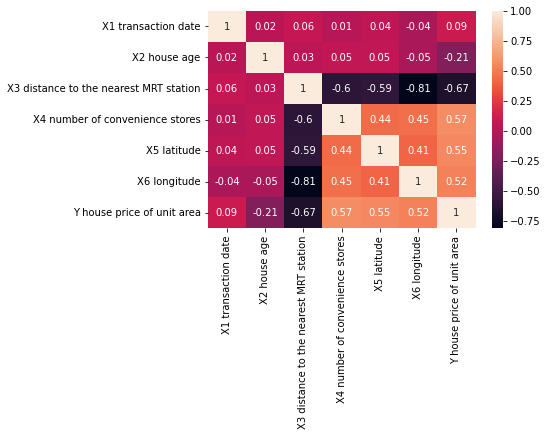

In [3]:
# Some EDA
sns.displot(df['Y house price of unit area'], bins=30, kde=True)
plt.show();

correlation_matrix = df.corr().round(2)
# annot = True # to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show();

In [4]:
y = df['Y house price of unit area']
X = df.drop('Y house price of unit area', axis=1)

## Linear Regresssion

In [5]:
splits = [0.2, 0.4, 0.3, 0.1]

# for tabulating results
sp = []
coef = []
intercept = []
MSE = []
r2 = []

for split in splits:

    # splitting
    
    sp.append('%d:%d' % (100-split*100, split*100))

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)

    # training

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    model = LinearRegression()
    model.fit(X_train, y_train)
    coef.append(model.coef_)
    intercept.append(model.intercept_)

    # Predict price for testing data

    y_pred = model.predict(X_test)

    #print(y_pred)


    # The mean squared error
    MSE.append('%.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    r2.append('%.2f' % r2_score(y_test, y_pred))

results = pd.DataFrame(zip(sp, [x[0] for x in coef], [x[1] for x in coef],
                           [x[2] for x in coef], [x[3] for x in coef],
                           [x[4] for x in coef], [x[5] for x in coef],
                           intercept, MSE, r2),
                       columns=["Split", "Coeff. X1", "Coeff. X2","Coeff. X3",
                                "Coeff. X4", "Coeff. X5", "Coeff. X6",
                                "Intercept", "MSE", "r2 value"])
results.style.hide_index()

Split,Coeff. X1,Coeff. X2,Coeff. X3,Coeff. X4,Coeff. X5,Coeff. X6,Intercept,MSE,r2 value
80:20,5.707712,-0.278561,-0.004258,1.156646,251.586167,-3.693195,-17280.547985,67.69,0.54
60:40,5.629109,-0.310373,-0.004241,1.190490,237.591938,-55.465067,-10480.623087,72.33,0.58
70:30,4.621494,-0.290820,-0.004709,0.971609,220.121987,-19.276634,-12412.985744,66.97,0.63
90:10,6.167880,-0.283979,-0.004489,1.106439,230.135382,-6.283201,-17356.003404,85.77,0.48


## Ridge Regression

In [6]:
splits = [0.2, 0.4, 0.3, 0.1]
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

# for tabulating results
sp = []
reg_param = []
MSE = []
r2 = []

for split in splits:

    # splitting
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)

    # training

    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error, r2_score
    
    for alpha in alphas:
        
        sp.append('%d:%d' % (100-split*100, split*100))
        reg_param.append("%.3f"% alpha)
        
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)

        # The mean squared error
        MSE.append('%.2f' % mean_squared_error(y_test, y_pred))

        # The coefficient of determination: 1 is perfect prediction
        r2.append('%.2f' % r2_score(y_test, y_pred))

results = pd.DataFrame(zip(sp, reg_param, MSE, r2),
                       columns=["Split","Regularization", "MSE", "r2 value"])
results.style.hide_index()

Split,Regularization,MSE,r2 value
80:20,0.001,76.99,0.58
80:20,0.005,76.64,0.58
80:20,0.010,76.45,0.58
80:20,0.050,76.98,0.58
80:20,0.100,77.71,0.57
80:20,0.500,79.04,0.57
60:40,0.001,71.61,0.60
60:40,0.005,71.54,0.60
60:40,0.010,71.63,0.60
60:40,0.050,72.89,0.59


## Lasso Model

In [7]:
splits = [0.2, 0.4, 0.3, 0.1]
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

# for tabulating results
sp = []
reg_param = []
MSE = []
r2 = []

for split in splits:

    # splitting
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)

    # training

    from sklearn.linear_model import Lasso
    from sklearn.metrics import mean_squared_error, r2_score
    
    for alpha in alphas:
        
        sp.append('%d:%d' % (100-split*100, split*100))
        reg_param.append("%.3f"% alpha)
        
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)

        # The mean squared error
        MSE.append('%.2f' % mean_squared_error(y_test, y_pred))

        # The coefficient of determination: 1 is perfect prediction
        r2.append('%.2f' % r2_score(y_test, y_pred))

results = pd.DataFrame(zip(sp, reg_param, MSE, r2),
                       columns=["Split","Regularization", "MSE", "r2 value"])
results.style.hide_index()

Split,Regularization,MSE,r2 value
80:20,0.001,55.65,0.53
80:20,0.005,56.59,0.52
80:20,0.010,58.61,0.50
80:20,0.050,64.21,0.46
80:20,0.100,63.98,0.46
80:20,0.500,64.31,0.45
60:40,0.001,77.72,0.57
60:40,0.005,77.32,0.57
60:40,0.010,77.94,0.57
60:40,0.050,82.13,0.54


# Exercise 2

In [8]:
# importing dataset

df = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", delimiter=",",
                   names=['Age','Year','No. of Nodes','Survival'])

df.replace({'Survival':{2:0,},},inplace=True) # Replace label 2 with 0
df

,Age,Year,No. of Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


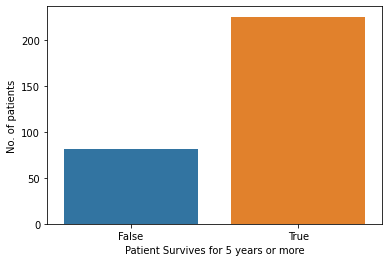

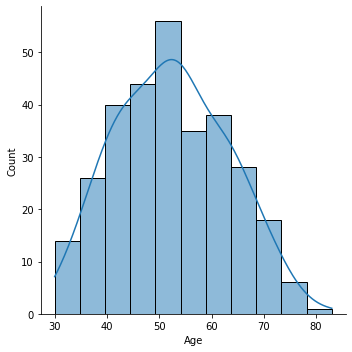

In [9]:
# some EDA

sns.barplot(x=df['Survival'].unique().astype(bool), y=df['Survival'].value_counts())
plt.xlabel('Patient Survives for 5 years or more')
plt.ylabel('No. of patients')
plt.show();

sns.displot(df['Age'], kde=True)
plt.show();

In [10]:
y=df['Survival']
X=df.drop('Survival',axis=1)

## Logistic Regression

In [11]:
splits = [0.2, 0.4, 0.3, 0.1]

for split in splits:
    # splitting
    
    print('Train-test split %d:%d' % (100-split*100, split*100))
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)

    # training

    from sklearn.linear_model import LogisticRegression
    model= LogisticRegression()

    model.fit(X_train, y_train)

    # predicting Survival for testing data
    y_pred = model.predict(X_test)

    print('Intercept is: %s'%float(model.intercept_))
    print('Coefficients are: %s'%model.coef_[0])

    print('Testing Predictions: \n', y_pred)

    # Classification error
    y_test = y_test.to_numpy(dtype=int)
    m = y_test.shape
    error= np.sum(y_test!=y_pred)/m
    print('Classification Error = %.2f'%float(error))
    print('\n')

Train-test split 80:20
Intercept is: 0.5934743464123629
Coefficients are: [-0.01715326  0.03060146 -0.09415555]
Testing Predictions: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification Error = 0.34


Train-test split 60:40
Intercept is: 3.5683599481754893
Coefficients are: [-0.0221706  -0.0136089  -0.11089403]
Testing Predictions: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1]
Classification Error = 0.27


Train-test split 70:30
Intercept is: -1.0599007003775995
Coefficients are: [-0.03220857  0.06659909 -0.1024254 ]
Testing Predictions: 
 [1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1